In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructor = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

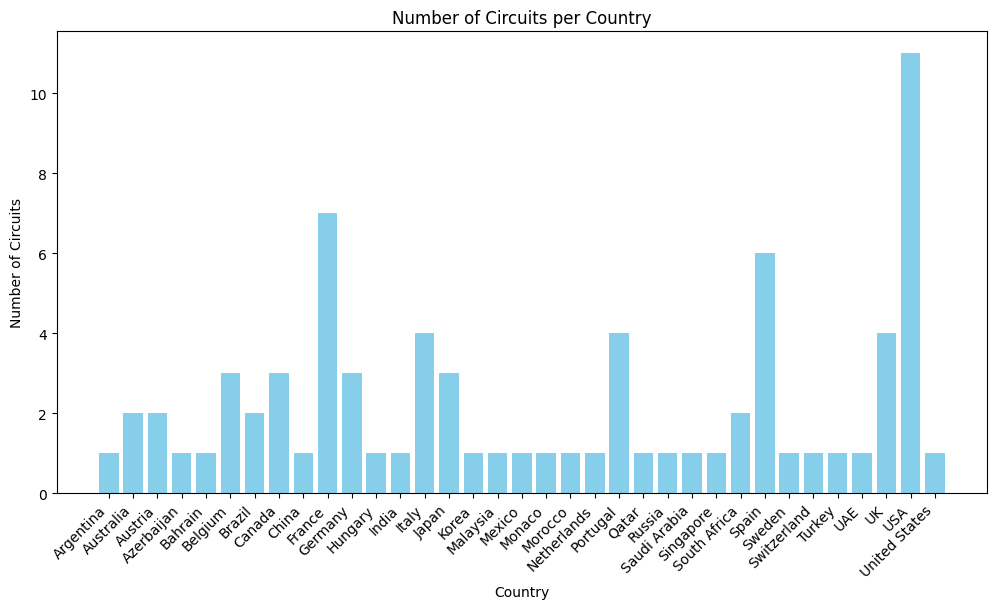

In [43]:
circuits_by_country = circuits.groupby('country')['circuitId'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(circuits_by_country['country'], circuits_by_country['circuitId'], color='skyblue')
plt.title('Number of Circuits per Country')
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

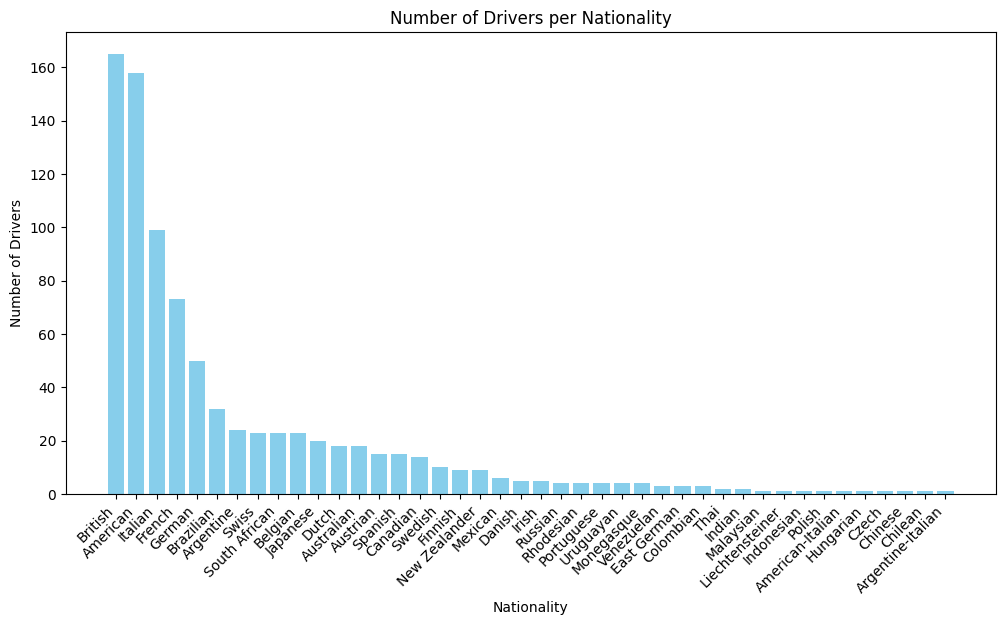

In [44]:
drivers_by_nationality = drivers.groupby('nationality')['driverId'].count().reset_index()

drivers_by_nationality = drivers_by_nationality.sort_values(by='driverId', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(drivers_by_nationality['nationality'], drivers_by_nationality['driverId'], color='skyblue')
plt.title('Number of Drivers per Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45, ha='right')

plt.show()

In [45]:
driver_wins = (
    drivers[['driverId', 'forename', 'surname']]
    .merge(results[['driverId', 'positionOrder']], how='left', on='driverId')
    .query("positionOrder == 1") 
    .groupby(['driverId', 'forename', 'surname'])['positionOrder']
    .count()
    .reset_index(name='wins')
)

top_10_drivers = driver_wins.sort_values(by='wins', ascending=False).head(10)

print(top_10_drivers[['forename', 'surname', 'wins']])


      forename     surname  wins
0        Lewis    Hamilton   103
15     Michael  Schumacher    91
11   Sebastian      Vettel    53
29       Alain       Prost    51
107        Max  Verstappen    45
27      Ayrton       Senna    41
2     Fernando      Alonso    32
26       Nigel     Mansell    31
64      Jackie     Stewart    27
40        Niki       Lauda    25


In [1]:
import ergast_py
import csv

e = ergast_py.Ergast()

In [35]:
import csv
from unidecode import unidecode
import ergast_py

def read_csv_file(file_path):
    seasons_and_races = []

    with open(file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            season = int(row['Season'])
            races = int(row['Races'])

            if 2005 <= season <= 2023:
                seasons_and_races.append({'season': season, 'races': races})

    return seasons_and_races

e = ergast_py.Ergast()

csv_file_path = 'formula_one_seasons.csv'
seasons_and_races = read_csv_file(csv_file_path)

race_data = []

for entry in seasons_and_races:
    season = entry['season']
    races = entry['races']
    print(f"Processing Season: {season}")

    races_to_exclude = set()
    if season == 2022:
        races_to_exclude.update([2, 11, 12])
    elif season == 2023:
        races_to_exclude.update([13, 18])

    for race_number in range(1, races + 1):
        if race_number not in races_to_exclude:
            print(f"  Processing Race: {race_number}")

            race_results = e.season(season).round(race_number).get_results()

            for result in race_results[0].results:
                driver_name = f"{result.driver.given_name} {result.driver.family_name}"
                constructor_name = result.constructor.name if result.constructor else "N/A"

                driver_name_ascii = unidecode(driver_name)
                constructor_name_ascii = unidecode(constructor_name)

                race_data.append({
                    'Season': season,
                    'Round_No': race_results[0].round_no,
                    'Position': result.position,
                    'Number': result.number,
                    'Driver': driver_name_ascii,
                    'Constructor': constructor_name_ascii,
                    'Laps': result.laps,
                    'Grid': result.grid,
                    'Time': result.time,
                    'Status': result.status,
                    'Points': result.points,
                })

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)

    writer.writeheader()

    for data_row in race_data:
        writer.writerow(data_row)

print(f"Data has been written to {csv_file_path}")


Processing Season: 2005
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Processing Race: 7
  Processing Race: 8
  Processing Race: 9
  Processing Race: 10
  Processing Race: 11
  Processing Race: 12
  Processing Race: 13
  Processing Race: 14
  Processing Race: 15
  Processing Race: 16
  Processing Race: 17
  Processing Race: 18
  Processing Race: 19
Processing Season: 2006
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Processing Race: 7
  Processing Race: 8
  Processing Race: 9
  Processing Race: 10
  Processing Race: 11
  Processing Race: 12
  Processing Race: 13
  Processing Race: 14
  Processing Race: 15
  Processing Race: 16
  Processing Race: 17
  Processing Race: 18
Processing Season: 2007
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Proc

In [38]:
import csv
from unidecode import unidecode
import ergast_py

def calculate_average_grid(data):
    driver_avg_grid = {}

    for entry in data:
        driver_name = entry['Driver']
        grid_position = entry['Grid']

        if driver_name not in driver_avg_grid:
            driver_avg_grid[driver_name] = {'TotalGrid': 0, 'TotalRaces': 0}

        if grid_position != 'N/A':
            driver_avg_grid[driver_name]['TotalGrid'] += int(grid_position)
            driver_avg_grid[driver_name]['TotalRaces'] += 1

    for driver, stats in driver_avg_grid.items():
        avg_grid = stats['TotalGrid'] / stats['TotalRaces']
        driver_avg_grid[driver]['AverageGrid'] = avg_grid

    return driver_avg_grid

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=csv_columns)
    next(reader)

    data_from_csv = [row for row in reader if row['Season'] == '2023']

driver_average_grid = calculate_average_grid(data_from_csv)

sorted_drivers = sorted(driver_average_grid.items(), key=lambda x: x[1]['AverageGrid'])

for driver, stats in sorted_drivers:
    print(f"{driver}: Average Grid Position - {stats['AverageGrid']:.2f}")


Max Verstappen: Average Grid Position - 3.15
Charles Leclerc: Average Grid Position - 4.85
Carlos Sainz: Average Grid Position - 5.85
Lewis Hamilton: Average Grid Position - 5.90
Fernando Alonso: Average Grid Position - 6.40
George Russell: Average Grid Position - 6.70
Sergio Perez: Average Grid Position - 7.40
Lando Norris: Average Grid Position - 8.55
Oscar Piastri: Average Grid Position - 9.70
Nico Hulkenberg: Average Grid Position - 9.95
Esteban Ocon: Average Grid Position - 10.25
Lance Stroll: Average Grid Position - 10.55
Pierre Gasly: Average Grid Position - 11.30
Alexander Albon: Average Grid Position - 12.20
Liam Lawson: Average Grid Position - 12.50
Valtteri Bottas: Average Grid Position - 12.75
Daniel Ricciardo: Average Grid Position - 13.67
Yuki Tsunoda: Average Grid Position - 13.80
Kevin Magnussen: Average Grid Position - 13.80
Nyck de Vries: Average Grid Position - 14.60
Guanyu Zhou: Average Grid Position - 14.90
Logan Sargeant: Average Grid Position - 16.20


In [43]:
import csv
from unidecode import unidecode
import ergast_py

def calculate_average_position(data):
    driver_avg_position = {}

    for entry in data:
        driver_name = entry['Driver']
        race_position = entry['Position']
        race_status = entry['Status']

        if driver_name not in driver_avg_position:
            driver_avg_position[driver_name] = {'TotalPosition': 0, 'TotalRaces': 0}

        if race_status in ('1', '11', '12'):
            driver_avg_position[driver_name]['TotalPosition'] += int(race_position)
            driver_avg_position[driver_name]['TotalRaces'] += 1

    for driver, stats in driver_avg_position.items():
        avg_position = stats['TotalPosition'] / stats['TotalRaces']
        driver_avg_position[driver]['AveragePosition'] = avg_position

    return driver_avg_position

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=csv_columns)
    next(reader)

    data_from_csv = [row for row in reader if row['Season'] == '2023']

driver_average_position = calculate_average_position(data_from_csv)

sorted_drivers = sorted(driver_average_position.items(), key=lambda x: x[1]['AveragePosition'])

for driver, stats in sorted_drivers:
    print(f"{driver}: Average Race Position - {stats['AveragePosition']:.2f}")


Max Verstappen: Average Race Position - 1.30
Sergio Perez: Average Race Position - 4.56
Lewis Hamilton: Average Race Position - 4.84
Charles Leclerc: Average Race Position - 4.88
George Russell: Average Race Position - 5.50
Fernando Alonso: Average Race Position - 5.79
Carlos Sainz: Average Race Position - 5.88
Lando Norris: Average Race Position - 7.74
Lance Stroll: Average Race Position - 8.87
Esteban Ocon: Average Race Position - 8.93
Oscar Piastri: Average Race Position - 9.67
Pierre Gasly: Average Race Position - 10.29
Alexander Albon: Average Race Position - 11.44
Liam Lawson: Average Race Position - 12.00
Daniel Ricciardo: Average Race Position - 12.33
Yuki Tsunoda: Average Race Position - 12.35
Valtteri Bottas: Average Race Position - 13.41
Guanyu Zhou: Average Race Position - 13.44
Nico Hulkenberg: Average Race Position - 14.33
Kevin Magnussen: Average Race Position - 14.73
Logan Sargeant: Average Race Position - 15.21
Nyck de Vries: Average Race Position - 15.50


In [7]:
import csv
from unidecode import unidecode

def calculate_average_position(data):
    driver_avg_position = {}

    for entry in data:
        driver_name = entry['Driver']
        race_position = entry['Position']
        grid_position = entry['Grid']
        race_status = entry['Status']

        if driver_name not in driver_avg_position:
            driver_avg_position[driver_name] = {'TotalPosition': 0, 'TotalRaces': 0, 'TotalGrid': 0}


        if race_status in ('1', '11', '12'):
            driver_avg_position[driver_name]['TotalPosition'] += int(race_position)
            driver_avg_position[driver_name]['TotalGrid'] += int(grid_position)
            driver_avg_position[driver_name]['TotalRaces'] += 1

    for driver, stats in driver_avg_position.items():
        avg_position = stats['TotalPosition'] / stats['TotalRaces']
        avg_grid = stats['TotalGrid'] / stats['TotalRaces']

        diff_position_grid = avg_grid - avg_position

        driver_avg_position[driver]['DifferencePositionGrid'] = diff_position_grid

    return driver_avg_position

csv_file_path = 'race_results_all_seasons_excluded.csv'
csv_columns = ['Season', 'Round_No', 'Position', 'Number', 'Driver', 'Constructor', 'Laps', 'Grid', 'Time', 'Status', 'Points']

with open(csv_file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=csv_columns)
    next(reader)

    data_from_csv = [row for row in reader if row['Season'] == '2023']

driver_average_position = calculate_average_position(data_from_csv)

sorted_drivers = sorted(driver_average_position.items(), key=lambda x: x[1]['DifferencePositionGrid'], reverse=True)

for driver, stats in sorted_drivers:
    print(f"{driver}: Difference - {stats['DifferencePositionGrid']:.2f}")


Sergio Perez: Difference - 3.11
Lance Stroll: Difference - 2.80
George Russell: Difference - 1.88
Max Verstappen: Difference - 1.85
Logan Sargeant: Difference - 1.50
Daniel Ricciardo: Difference - 1.33
Lewis Hamilton: Difference - 1.21
Yuki Tsunoda: Difference - 1.18
Guanyu Zhou: Difference - 1.17
Pierre Gasly: Difference - 1.00
Esteban Ocon: Difference - 0.64
Alexander Albon: Difference - 0.62
Liam Lawson: Difference - 0.50
Lando Norris: Difference - 0.47
Fernando Alonso: Difference - 0.26
Charles Leclerc: Difference - 0.24
Oscar Piastri: Difference - -0.17
Carlos Sainz: Difference - -0.88
Valtteri Bottas: Difference - -1.35
Nyck de Vries: Difference - -1.38
Kevin Magnussen: Difference - -1.53
Nico Hulkenberg: Difference - -4.44


In [34]:
import csv
from unidecode import unidecode
import ergast_py

def read_csv_file(file_path):
    seasons_and_races = []

    with open(file_path, 'r') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            season = int(row['Season'])
            races = int(row['Races'])

            if 2005 <= season <= 2023:
                seasons_and_races.append({'season': season, 'races': races})

    return seasons_and_races

e = ergast_py.Ergast()

csv_file_path = 'formula_one_seasons.csv'
seasons_and_races = read_csv_file(csv_file_path)

driver_data = []

for entry in seasons_and_races:
    season = entry['season']
    races = entry['races']
    print(f"Processing Season: {season}")

    for race_number in range(1, races + 1):
        print(f"  Processing Race: {race_number}")

        qualy_results = e.season(season).round(race_number).get_qualifyings()

        for result in qualy_results:
            for driver_result in result.qualifying_results:
                driver_name = f"{driver_result.driver.given_name} {driver_result.driver.family_name}"
                constructor_name = driver_result.constructor.name if driver_result.constructor else "N/A"
                qualifying_times = [
                    driver_result.qual_1,
                    driver_result.qual_2,
                    driver_result.qual_3,
                ]

                qualifying_times = [time for time in qualifying_times if time is not None]

                if qualifying_times:
                    fastest_time = min(qualifying_times)

                    driver_name_ascii = unidecode(driver_name)
                    constructor_name_ascii = unidecode(constructor_name)

                    driver_data.append({
                        'Season': season,
                        'Round_No': result.round_no,
                        'Driver_Name': driver_name_ascii,
                        'Constructor_Name': constructor_name_ascii,
                        'Fastest_Qualifying_Time': fastest_time,
                    })

csv_file_path = 'qualifying_data_all_seasons.csv'
csv_columns = ['Season', 'Round_No', 'Driver_Name', 'Constructor_Name', 'Fastest_Qualifying_Time']

with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)

    writer.writeheader()

    for data_row in driver_data:
        writer.writerow(data_row)

print(f"Data has been written to {csv_file_path}")


Processing Season: 2005
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Processing Race: 7
  Processing Race: 8
  Processing Race: 9
  Processing Race: 10
  Processing Race: 11
  Processing Race: 12
  Processing Race: 13
  Processing Race: 14
  Processing Race: 15
  Processing Race: 16
  Processing Race: 17
  Processing Race: 18
  Processing Race: 19
Processing Season: 2006
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Processing Race: 7
  Processing Race: 8
  Processing Race: 9
  Processing Race: 10
  Processing Race: 11
  Processing Race: 12
  Processing Race: 13
  Processing Race: 14
  Processing Race: 15
  Processing Race: 16
  Processing Race: 17
  Processing Race: 18
Processing Season: 2007
  Processing Race: 1
  Processing Race: 2
  Processing Race: 3
  Processing Race: 4
  Processing Race: 5
  Processing Race: 6
  Proc

In [58]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Round_No 1 and Season 2023
filtered_df = df[(df['Round_No'] == 15) & (df['Season'] == 2023)].copy()  # Use .copy() to avoid the warning

# Convert 'Fastest_Qualifying_Time' to milliseconds
filtered_df['Fastest_Qualifying_Time'] = pd.to_timedelta(filtered_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the fastest time for the overall fastest constructor
fastest_time = filtered_df['Fastest_Qualifying_Time'].min()

# Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor
result_df = filtered_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

# Calculate the percentage for each constructor relative to the fastest constructor
result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

# Sort the DataFrame by the 'Percentage_Relative_to_Fastest' column in ascending order
result_df = result_df.sort_values(by='Percentage_Relative_to_Fastest')

# Display the result
print(result_df[['Constructor_Name', 'Fastest_Qualifying_Time', 'Percentage_Relative_to_Fastest']])


  Constructor_Name  Fastest_Qualifying_Time  Percentage_Relative_to_Fastest
4          Ferrari                  90984.0                      100.000000
7         Mercedes                  91056.0                      100.079135
6          McLaren                  91270.0                      100.314341
5     Haas F1 Team                  91575.0                      100.649565
3     Aston Martin                  91615.0                      100.693529
2   Alpine F1 Team                  91673.0                      100.757276
1       AlphaTauri                  91991.0                      101.106788
8         Red Bull                  92099.0                      101.225490
9         Williams                  92668.0                      101.850875
0       Alfa Romeo                  92809.0                      102.005847


In [20]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for the 2023 season
df_2023 = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
df_2023['Fastest_Qualifying_Time'] = pd.to_timedelta(df_2023['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Create an empty list to store results
average_percentage_data = []

# Loop through all rounds in the 2023 season
for round_no in df_2023['Round_No'].unique():
    # Filter the DataFrame for the current round
    filtered_df = df_2023[df_2023['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in the current round
    fastest_time = filtered_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor
    result_df = filtered_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Append the results to the list
    average_percentage_data.append(result_df[['Constructor_Name', 'Percentage_Relative_to_Fastest']])

# Concatenate all DataFrames in the list
average_percentage_df = pd.concat(average_percentage_data, ignore_index=True)

# Calculate the average percentage for each constructor across all rounds
average_percentage_df = average_percentage_df.groupby('Constructor_Name')['Percentage_Relative_to_Fastest'].mean().reset_index()

# Sort the DataFrame by the 'Percentage_Relative_to_Fastest' column in ascending order
average_percentage_df = average_percentage_df.sort_values(by='Percentage_Relative_to_Fastest')

# Display the result
print(average_percentage_df)


  Constructor_Name  Percentage_Relative_to_Fastest
8         Red Bull                      100.133409
4          Ferrari                      100.414852
7         Mercedes                      100.623786
6          McLaren                      100.857091
3     Aston Martin                      100.960479
2   Alpine F1 Team                      101.996899
9         Williams                      102.040366
5     Haas F1 Team                      102.308659
1       AlphaTauri                      102.522516
0       Alfa Romeo                      102.740991


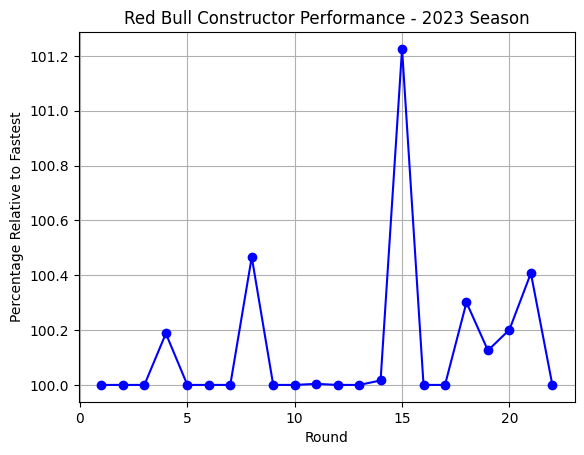

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for Red Bull
red_bull_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the Red Bull constructor in this round
    red_bull_result = result_df[result_df['Constructor_Name'] == 'Red Bull']

    # Append the percentage for Red Bull to the list
    red_bull_percentages.append(red_bull_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a blue line
plt.plot(unique_rounds, red_bull_percentages, marker='o', linestyle='-', color='blue')
plt.title('Red Bull Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


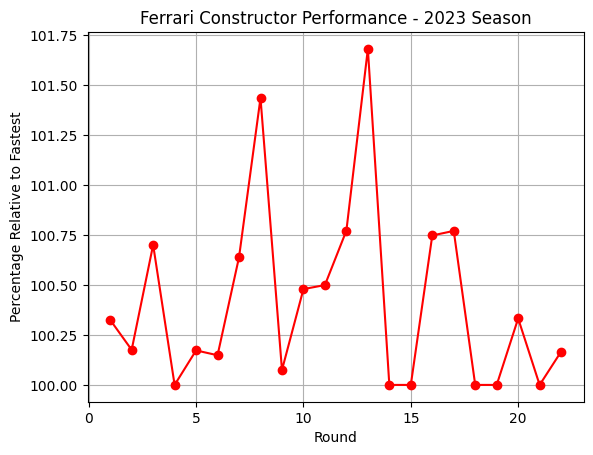

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for Ferrari
ferrari_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the Ferrari constructor in this round
    ferrari_result = result_df[result_df['Constructor_Name'] == 'Ferrari']

    # Append the percentage for Ferrari to the list
    ferrari_percentages.append(ferrari_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a red line for Ferrari
plt.plot(unique_rounds, ferrari_percentages, marker='o', linestyle='-', color='red')
plt.title('Ferrari Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


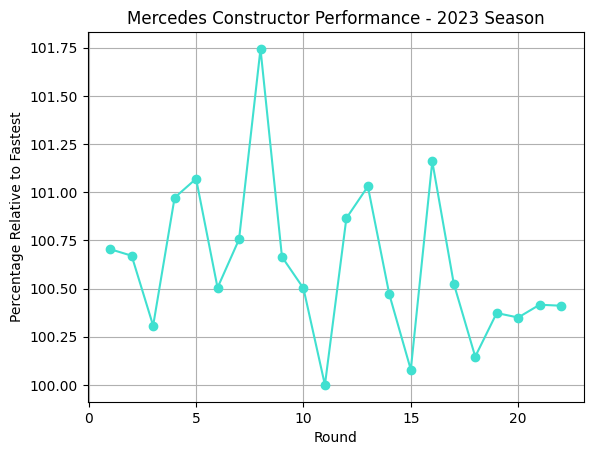

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for Mercedes
mercedes_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the Mercedes constructor in this round
    mercedes_result = result_df[result_df['Constructor_Name'] == 'Mercedes']

    # Append the percentage for Mercedes to the list
    mercedes_percentages.append(mercedes_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a turquoise line for Mercedes
plt.plot(unique_rounds, mercedes_percentages, marker='o', linestyle='-', color='turquoise')
plt.title('Mercedes Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


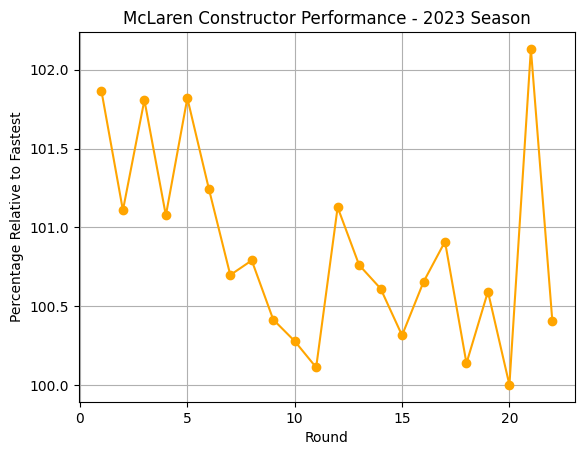

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for McLaren
mclaren_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the McLaren constructor in this round
    mclaren_result = result_df[result_df['Constructor_Name'] == 'McLaren']

    # Append the percentage for McLaren to the list
    mclaren_percentages.append(mclaren_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with an orange line for McLaren
plt.plot(unique_rounds, mclaren_percentages, marker='o', linestyle='-', color='orange')
plt.title('McLaren Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


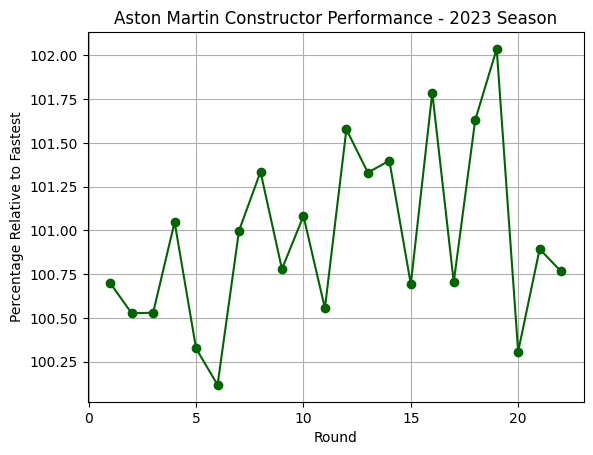

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for Aston Martin
aston_martin_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the Aston Martin constructor in this round
    aston_martin_result = result_df[result_df['Constructor_Name'] == 'Aston Martin']

    # Append the percentage for Aston Martin to the list
    aston_martin_percentages.append(aston_martin_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a dark green line for Aston Martin
plt.plot(unique_rounds, aston_martin_percentages, marker='o', linestyle='-', color='darkgreen')
plt.title('Aston Martin Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


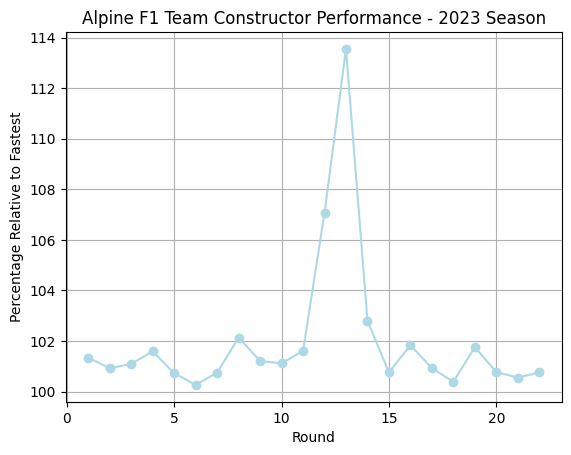

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for Alpine F1 Team
alpine_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the Alpine F1 Team in this round
    alpine_result = result_df[result_df['Constructor_Name'] == 'Alpine F1 Team']

    # Append the percentage for Alpine F1 Team to the list
    alpine_percentages.append(alpine_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a light blue line for Alpine F1 Team
plt.plot(unique_rounds, alpine_percentages, marker='o', linestyle='-', color='lightblue')
plt.title('Alpine F1 Team Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


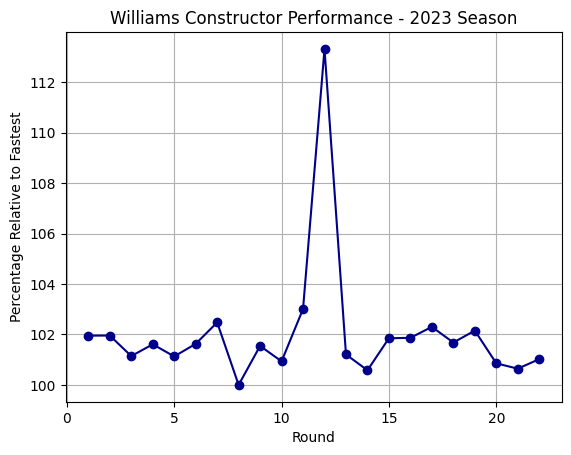

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for Williams
williams_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the Williams constructor in this round
    williams_result = result_df[result_df['Constructor_Name'] == 'Williams']

    # Append the percentage for Williams to the list
    williams_percentages.append(williams_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a dark blue line for Williams
plt.plot(unique_rounds, williams_percentages, marker='o', linestyle='-', color='darkblue')
plt.title('Williams Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


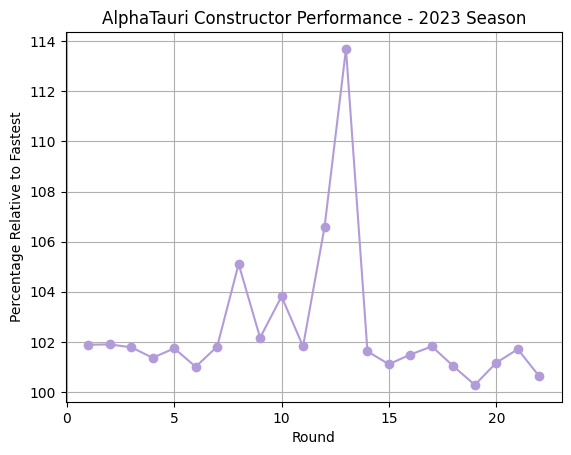

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for AlphaTauri
alphatauri_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the AlphaTauri constructor in this round
    alphatauri_result = result_df[result_df['Constructor_Name'] == 'AlphaTauri']

    # Append the percentage for AlphaTauri to the list
    alphatauri_percentages.append(alphatauri_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a color not previously used for AlphaTauri
plt.plot(unique_rounds, alphatauri_percentages, marker='o', linestyle='-', color='#B19CD9')
plt.title('AlphaTauri Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


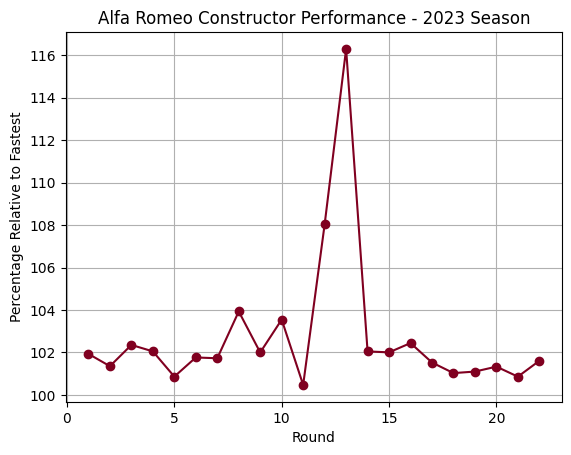

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for Alfa Romeo
alfa_romeo_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the Alfa Romeo constructor in this round
    alfa_romeo_result = result_df[result_df['Constructor_Name'] == 'Alfa Romeo']

    # Append the percentage for Alfa Romeo to the list
    alfa_romeo_percentages.append(alfa_romeo_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a burgundy color for Alfa Romeo
plt.plot(unique_rounds, alfa_romeo_percentages, marker='o', linestyle='-', color='#800020')  # Hex color for burgundy
plt.title('Alfa Romeo Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()


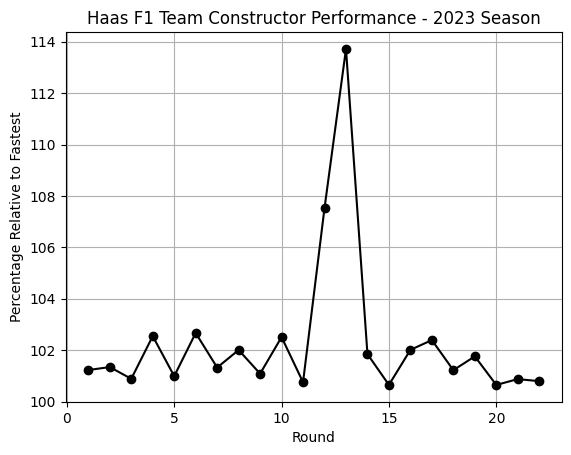

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('qualifying_data_all_seasons.csv')

# Filter the DataFrame for Season 2023
season_2023_df = df[df['Season'] == 2023].copy()

# Convert 'Fastest_Qualifying_Time' to milliseconds
season_2023_df['Fastest_Qualifying_Time'] = pd.to_timedelta(season_2023_df['Fastest_Qualifying_Time']).dt.total_seconds() * 1000

# Find the unique rounds in the 2023 season
unique_rounds = season_2023_df['Round_No'].unique()

# Store the percentages for each round for Haas F1 Team
haas_percentages = []

# Iterate over each round and calculate results
for round_no in unique_rounds:
    # Filter data for the current round
    round_df = season_2023_df[season_2023_df['Round_No'] == round_no].copy()

    # Find the fastest time for the overall fastest constructor in this round
    fastest_time = round_df['Fastest_Qualifying_Time'].min()

    # Group the data by Constructor_Name and find the minimum Fastest_Qualifying_Time for each constructor in this round
    result_df = round_df.groupby('Constructor_Name')['Fastest_Qualifying_Time'].min().reset_index()

    # Calculate the percentage for each constructor relative to the fastest constructor in this round
    result_df['Percentage_Relative_to_Fastest'] = (result_df['Fastest_Qualifying_Time'] / fastest_time) * 100

    # Filter the DataFrame to include only the Haas F1 Team in this round
    haas_result = result_df[result_df['Constructor_Name'] == 'Haas F1 Team']

    # Append the percentage for Haas F1 Team to the list
    haas_percentages.append(haas_result['Percentage_Relative_to_Fastest'].values[0])

# Create a line chart with a black line for Haas F1 Team
plt.plot(unique_rounds, haas_percentages, marker='o', linestyle='-', color='black')
plt.title('Haas F1 Team Constructor Performance - 2023 Season')
plt.xlabel('Round')
plt.ylabel('Percentage Relative to Fastest')
plt.grid(True)
plt.show()
